In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

!gdown 19KMQKCLGzk6dyc7adubyA_mLzayU67CQ

Downloading...
From: https://drive.google.com/uc?id=19KMQKCLGzk6dyc7adubyA_mLzayU67CQ
To: /content/IBM.csv
100% 1.57M/1.57M [00:00<00:00, 161MB/s]


In [ ]:
data = pd.read_csv('IBM.csv')

In [ ]:
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [ ]:
for col in data.columns:
  if len(set(data[col]))<12:
    print(col,len(set(data[col])))

State 5
Response 2
Coverage 3
Education 5
EmploymentStatus 5
Gender 2
Location Code 3
Marital Status 3
Number of Open Complaints 6
Number of Policies 9
Policy Type 3
Policy 9
Renew Offer Type 4
Sales Channel 4
Vehicle Class 6
Vehicle Size 3


In [ ]:
set(data['Policy Type'])

{'Corporate Auto', 'Personal Auto', 'Special Auto'}

In [ ]:
set(data['Policy'])

{'Corporate L1',
 'Corporate L2',
 'Corporate L3',
 'Personal L1',
 'Personal L2',
 'Personal L3',
 'Special L1',
 'Special L2',
 'Special L3'}

In [ ]:
#because the Policy & Policy Type say same thing, I dropped the first one
data = data.drop(['Policy Type'],axis=1)
#then I splited Policy column to 2 seperated columns and drpped it too
data[['Type','Level']] = (data['Policy'].str.split(' ',expand=True))
data = data.drop(['Policy'],axis=1)
data[['Type','Level']]

,Type,Level
0,Corporate,L3
1,Personal,L3
2,Personal,L3
3,Corporate,L2
4,Personal,L1
...,...,...
9129,Personal,L1
9130,Corporate,L3
9131,Corporate,L2
9132,Personal,L2


In [ ]:
# group people by their state income average
data['AvIncome'] = (data.groupby('State')['Income'].transform('mean'))
data[['AvIncome','State','Income']]

,AvIncome,State,Income
0,38122.733083,Washington,56274
1,37405.402231,Arizona,0
2,38369.605442,Nevada,48767
3,37558.946667,California,0
4,38122.733083,Washington,43836
...,...,...,...
9129,37558.946667,California,71941
9130,37558.946667,California,21604
9131,37558.946667,California,0
9132,37558.946667,California,21941


In [ ]:
data['CovIncome'] = (data.groupby('Coverage')['Income'].transform('mean'))
data[['CovIncome','Coverage','Income']]

,CovIncome,Coverage,Income
0,38145.834770,Basic,56274
1,36380.099927,Extended,0
2,38607.120146,Premium,48767
3,38145.834770,Basic,0
4,38145.834770,Basic,43836
...,...,...,...
9129,38145.834770,Basic,71941
9130,36380.099927,Extended,21604
9131,36380.099927,Extended,0
9132,36380.099927,Extended,21941


In [ ]:
# usless feature
data = data.drop(['Customer','Effective To Date'], axis = 1)

In [ ]:
num_lst = [col for col in data.columns if data[col].dtype!='object']
for col in num_lst:
    data[col] = (data[col] - data[col].mean(axis=0))/data[col].std(axis=0)
data

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Number of Policies,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Type,Level,AvIncome,CovIncome
0,Washington,-0.762836,No,Basic,Bachelor,Employed,F,0.612794,Suburban,Married,...,-0.822603,Offer1,Agent,-0.169630,Two-Door Car,Medsize,Corporate,L3,1.587358,0.576995
1,Arizona,-0.149237,No,Extended,Bachelor,Unemployed,F,-1.239549,Suburban,Single,...,2.106045,Offer3,Agent,2.400606,Four-Door Car,Medsize,Personal,L3,-0.859517,-1.508807
2,Nevada,0.710597,No,Premium,Bachelor,Employed,F,0.365690,Suburban,Married,...,-0.404225,Offer1,Agent,0.455709,Two-Door Car,Medsize,Personal,L3,2.429459,1.121895
3,California,-0.052260,No,Basic,Bachelor,Unemployed,M,-1.239549,Suburban,Married,...,1.687666,Offer1,Call Center,0.329750,SUV,Medsize,Corporate,L2,-0.335764,0.576995
4,Washington,-0.755534,No,Basic,Bachelor,Employed,M,0.203379,Rural,Single,...,-0.822603,Offer1,Agent,-1.018788,Four-Door Car,Medsize,Personal,L1,1.587358,0.576995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,2.241467,No,Basic,Bachelor,Employed,M,1.128497,Urban,Married,...,-0.404225,Offer2,Web,-0.811890,Four-Door Car,Medsize,Personal,L1,-0.335764,0.576995
9130,California,-0.714372,Yes,Extended,College,Employed,F,-0.528421,Suburban,Divorced,...,-0.822603,Offer1,Branch,-0.188946,Four-Door Car,Medsize,Corporate,L3,-0.335764,-1.508807
9131,California,0.023134,No,Extended,Bachelor,Unemployed,M,-1.239549,Suburban,Single,...,-0.404225,Offer1,Branch,1.227869,Four-Door Car,Medsize,Corporate,L2,-0.335764,-1.508807
9132,California,-0.069932,No,Extended,College,Employed,M,-0.517328,Suburban,Married,...,0.014154,Offer3,Branch,0.885064,Four-Door Car,Large,Personal,L2,-0.335764,-1.508807


In [ ]:
obj_lst = [col for col in data.columns if data[col].dtype=='object']
lb = LabelEncoder()
for col in obj_lst:
    data[col] = lb.fit_transform(data[col])
data

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Number of Policies,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Type,Level,AvIncome,CovIncome
0,4,-0.762836,0,0,0,1,0,0.612794,1,1,...,-0.822603,0,0,-0.169630,5,1,0,2,1.587358,0.576995
1,0,-0.149237,0,1,0,4,0,-1.239549,1,2,...,2.106045,2,0,2.400606,0,1,1,2,-0.859517,-1.508807
2,2,0.710597,0,2,0,1,0,0.365690,1,1,...,-0.404225,0,0,0.455709,5,1,1,2,2.429459,1.121895
3,1,-0.052260,0,0,0,4,1,-1.239549,1,1,...,1.687666,0,2,0.329750,3,1,0,1,-0.335764,0.576995
4,4,-0.755534,0,0,0,1,1,0.203379,0,2,...,-0.822603,0,0,-1.018788,0,1,1,0,1.587358,0.576995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,2.241467,0,0,0,1,1,1.128497,2,1,...,-0.404225,1,3,-0.811890,0,1,1,0,-0.335764,0.576995
9130,1,-0.714372,1,1,1,1,0,-0.528421,1,0,...,-0.822603,0,1,-0.188946,0,1,0,2,-0.335764,-1.508807
9131,1,0.023134,0,1,0,4,1,-1.239549,1,2,...,-0.404225,0,1,1.227869,0,1,0,1,-0.335764,-1.508807
9132,1,-0.069932,0,1,1,1,1,-0.517328,1,1,...,0.014154,2,1,0.885064,0,0,1,1,-0.335764,-1.508807


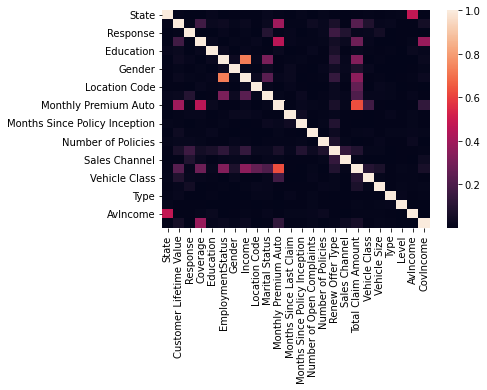

In [ ]:
import seaborn as sns
sns.heatmap((data.iloc[:,:25]).corr().abs())

(Text(0.5, 0, 't-SNE-1'), Text(0, 0.5, 't-SNE-2'))

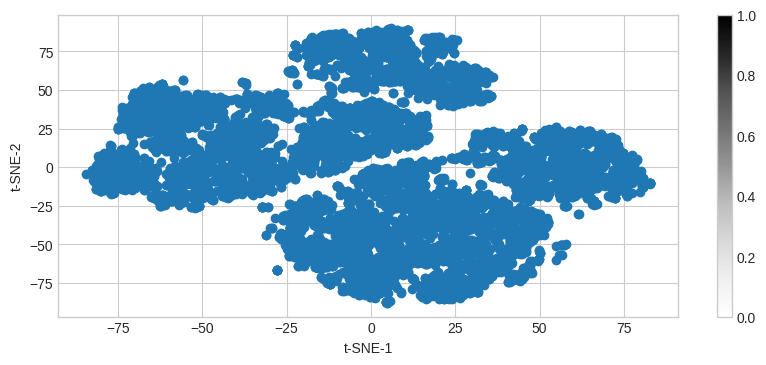

In [ ]:
# let's watch the shape of data, if it's spherical, then we can use kmeans else dbscan
tsne = TSNE(2)
data_tsne = tsne.fit_transform(data)

plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,4), dpi=100)
plt.scatter(data_tsne[:,0],data_tsne[:,1])
plt.colorbar()
plt.xlabel('t-SNE-1') , plt.ylabel('t-SNE-2')

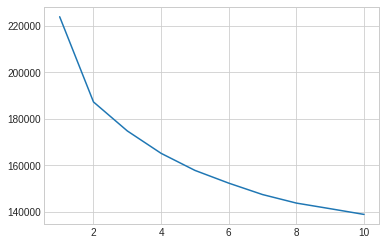

In [ ]:
wcss = {}
for k in range(10):
  kmeans = KMeans(n_clusters=k+1,init='k-means++',random_state=42)
  kmeans.fit(data)
  wcss[k+1] = kmeans.inertia_
plt.plot(list(wcss.keys()),list(wcss.values()))

Text(0.5, 1.0, 'actual label')

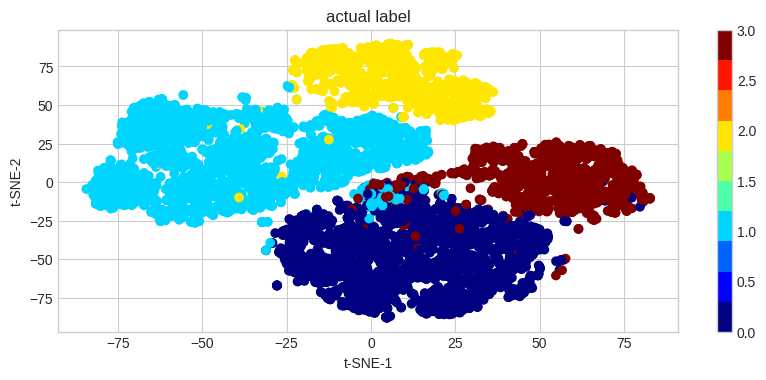

In [ ]:
kmeans = KMeans(4)
y_kmeans = kmeans.fit_predict(data)
c_map = plt.cm.get_cmap('jet', 10)
plt.figure(figsize = (10,4), dpi=100)
plt.scatter(data_tsne[:,0],data_tsne[:,1],c=y_kmeans,cmap=c_map)
plt.colorbar()
plt.xlabel('t-SNE-1') , plt.ylabel('t-SNE-2')
plt.title('actual label')